# 21.10.04                                                                                  

In [17]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

### 1. (dice game) 1부터 6까지의 수 중에 하나의 수를 임의로 선택하는 시행을 20번 시행하여 그 결과를 리스트 형태로 저장 

In [18]:
def dice_game(number):
    dice0=[]
    for i in range(number):
        d = np.random.randint(1,7)
        dice0.append(d)
    return dice0
dice = dice_game(20)
print("dice :",dice)
print("dice 갯수 :",len(dice))


dice : [4, 3, 3, 2, 6, 2, 1, 1, 3, 1, 6, 1, 3, 3, 3, 2, 3, 3, 1, 6]
dice 갯수 : 20


### 2. 위에서 얻은 dice의 결과값을 기준으로  각 수 (1부터 6까지) 에 해당하는 빈도를 구한 후, 해당 빈도를 기준으로 확률값 확인

In [19]:
p_dice = [0]*6
for i in dice:
    p_dice[i-1]+=1
print("빈도 :", p_dice)


for i in range(6):
    p_dice[i] = p_dice[i]/20
print("확률 :",p_dice)


빈도 : [5, 3, 8, 1, 0, 3]
확률 : [0.25, 0.15, 0.4, 0.05, 0.0, 0.15]


### 3. 위 2 번 결과를 나타내는 세로 막대 그래프

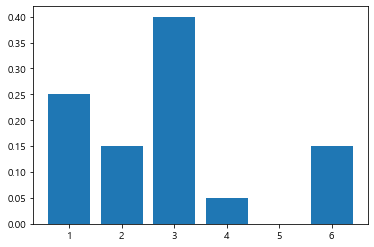

In [20]:
plt.bar(range(1,7),p_dice)

plt.show()

### 4. 위 2번 결과를 기준으로 하는 기대값과 분산

In [21]:
n= [1,2,3,4,5,6]

# 직접 함수 작성
def mean(q):
    return sum(q)/len(q)

def expec(w):
    result = 0
    for i in w:
        result+=i/len(w)

    return result

def var(s):
    vsum=0
    for val in s: 
        vsum = vsum + (val - mean(s))**2 
    variance = vsum / len(s) 
    return variance

print("이론상의 기대값 :", expec(n))
print("이론상의 분산 :", var(n))
print()
print("위 2번 실험의 기대값 :", expec(dice))
print("위 2번 실험의 분산 :",var(dice))


# numpy 활용
#num_var = np.var(dice)
#print(num_var)

이론상의 기대값 : 3.5
이론상의 분산 : 2.9166666666666665

위 2번 실험의 기대값 : 2.849999999999999
위 2번 실험의 분산 : 2.5275


### 5. 위의 dice game 을 20번 대신 200번 수행한다면, 현재의 결과가 바뀔 수 있는 지 아니면, 유지될 수 있는가

[3.5, 3.1, 3.5349999999999904, 3.517999999999949, 3.5035000000004493]
[2.9166666666666665, 3.4474999999999993, 2.959975, 2.963979749999938, 2.9221769599995473]

이론상의 기대값 : 3.5
이론상의 분산 : 2.9166666666666665

20번 수행
기대값 : 3.1
분산 : 3.4474999999999993

200번 수행
기대값 : 3.5349999999999904
분산 : 2.959975

2000번 수행
기대값 : 3.517999999999949
분산 : 2.963979749999938

20000번 수행
기대값 : 3.5035000000004493
분산 : 2.9221769599995473


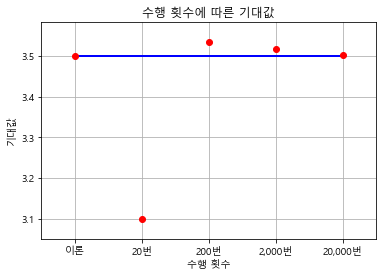

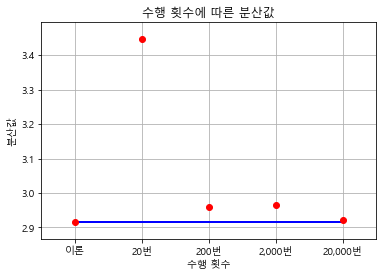

결론 : Dice game의 수행 횟수를 증가시키면 이론상의 수치로 점차 가까워지는 모습을 보여준다. 
따라서 수행횟수에 따라 현재의 결과는 얼마든지 변할 수 있다.


In [22]:
exp_list = []
var_list = []

exp_list.append(expec(n))
var_list.append(var(n))

min0 = 20
max0 = 20001
#min0 = input("최소 숫자 :")
#max0 = input("최대 숫자 :")
while(min0 < max0):
    exp_list.append(expec(dice_game(min0)))
    var_list.append(var(dice_game(min0)))
    min0*=10
    
print(exp_list)
print(var_list)



print("\n이론상의 기대값 :", exp_list[0])
print("이론상의 분산 :", var_list[0])

print("\n20번 수행")
print("기대값 :", exp_list[1])
print("분산 :",var_list[1])

print("\n200번 수행")
print("기대값 :", exp_list[2])
print("분산 :", var_list[2])

print("\n2000번 수행") 
print("기대값 :", exp_list[3])
print("분산 :",var_list[3])

print("\n20000번 수행") 
print("기대값 :", exp_list[4])
print("분산 :",var_list[4])

import os


# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정

if os.name == 'posix':
    pass
else:
    plt.rc("font", family="Malgun Gothic")
ticklabel = ['이론', '20번', '200번', '2,000번','20,000번'] 
values = range(len(exp_list))


plt.plot(exp_list,'ro')
plt.axis([-0.5,4.5,min(exp_list)-0.05,max(exp_list)+0.05])
plt.grid()
plt.title("수행 횟수에 따른 기대값")
plt.ylabel("기대값")
plt.xlabel("수행 횟수")
plt.xticks(np.arange(0,5,1), ['이론', '20번', '200번', '2,000번','20,000번'])
plt.hlines(exp_list[0],0,4,color="blue", linestyles='solid', linewidth=2)
plt.show()


plt.plot(var_list,'ro')
plt.axis([-0.5,4.5,min(var_list)-0.05,max(var_list)+0.05])
plt.grid()
plt.title("수행 횟수에 따른 분산값")
plt.ylabel("분산값")
plt.xlabel("수행 횟수")
plt.xticks(np.arange(0,5,1), ['이론', '20번', '200번', '2,000번','20,000번'])
plt.hlines(var_list[0],0,4,color="blue", linestyles='solid', linewidth=2)
plt.show()

print("결론 : Dice game의 수행 횟수를 증가시키면 이론상의 수치로 점차 가까워지는 모습을 보여준다. \n따라서 수행횟수에 따라 현재의 결과는 얼마든지 변할 수 있다.")